In [457]:
# 1. Try other values of lambd, k
# 2. Build graph using this and run CC/networkx on it
# 3. Visualize by making subplot 312 313 as wide as 1:1 unit:unit suggests
# 4. Try other distance metrices
# 5. Idea: to close the feedback loop for finding parameters, need to develop training data (hand-labeled by Mohammed)?
#      -benefit: would not have to physically ask him
# 6. Eliminate duplicates in tweet body (they are spam)
#      -idea: use hash tables
# 7. Eliminate tweets outside borders
#      -since they are not by first-hand account of ceasefire violation (but by media)

import numpy as np
from sklearn import cluster
from matplotlib import pyplot as plt
data = np.genfromtxt('tweet.csv', delimiter=",")
print data[0][0]

1.46127409465e+12


In [458]:
# Normalization
lambd = 10/(24*3.6e+6)
#lambd = 10/(48*3.6e+6) # Bad result
#lambd = 10/(6*3.6e+6) # No difference
k_max=8
#STOP=200
#STOP=142
STOP = len(data)+1
mydata = data[:STOP,:]
mydata[:STOP,0] = data[:STOP,0]*lambd
#400/(lambd*3600*1000*24)
print mydata[0], mydata[141]
#print mydata
print len(mydata)
print (10+169100)/lambd
print (20+169100)/lambd
print (21+169100)/lambd
print (30+169100)/lambd
print (34+169100)/lambd
print (39+169100)/lambd
print (44+169100)/lambd
print (54+169100)/lambd
print (58+169100)/lambd
print (70+169100)/lambd

[  1.69128946e+05   4.27609994e+01   2.02740567e+01] [  1.69184462e+05   4.41859454e+01   1.53516763e+01]
506
1.4611104e+12
1.4611968e+12
1.46120544e+12
1.4612832e+12
1.46131776e+12
1.46136096e+12
1.46140416e+12
1.46149056e+12
1.46152512e+12
1.4616288e+12


In [459]:
data_label = np.loadtxt('tweet_label.txt', dtype=np.str, delimiter="\n")
#label_list = np.zeros(len(mydata))-1 
label_list = np.zeros(len(mydata)) 
count = 0 
for i in range(len(data_label)): 
    if data_label[i][2:6]=='http' or data_label[i][3:7]=='http': 
        try: 
            label_list[count] = int(data_label[i][0:2]) 
            count+=1 
            if count==len(mydata): 
                break
        #print( data_label[i][0:2])
        except ValueError:
            continue
print np.where(label_list==7)

(array([152, 153, 154, 155, 156, 157]),)


In [460]:
event=10
#print label_list==1
true_centroid = np.zeros((event,3))
for i in range(2,event+2):
    #true_centroid[i-2] = np.sum(label_list==i)
    val = np.mean(mydata[np.where(label_list==i),:],1)
    if np.isnan(val[0,0])==False:
        true_centroid[i-2,:] = val
        
true_centroid = true_centroid[true_centroid[:,0]>0]
print true_centroid

[[  1.69156946e+05   4.76466991e+01   1.49782494e+01]
 [  1.69177538e+05   4.66833310e+01   1.55225246e+01]
 [  1.69187949e+05   4.23367807e+01   1.82160012e+01]]


In [461]:
event=10
#true_true_centroid = np.array([[1461456000*lambd*1000, 49.127760, 14.542448],[1461628800*lambd*1000, 49.366045, 16.919521]])
true_true_centroid = np.array([[true_centroid[0,0], 49.127760, 14.542448],[true_centroid[1,0], 49.366045, 16.919521]])
print true_true_centroid

[[  1.69156946e+05   4.91277600e+01   1.45424480e+01]
 [  1.69177538e+05   4.93660450e+01   1.69195210e+01]]


In [470]:
curated = mydata[np.where(label_list>=1)]
#print curated

[ 14418.48253136   4087.53259618   2077.97833174   1530.23992144
   1056.70599288    779.05890618    624.99236325]


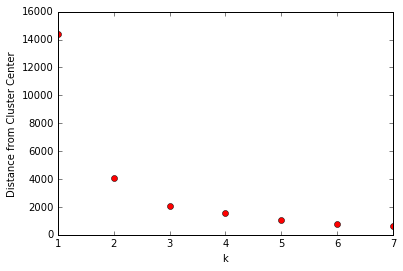

In [471]:
inertia = np.zeros(k_max-1)
for k in range(1,k_max):

    #print mydata[0,0], mydata[141,0]
    #print len(mydata)
    
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(curated)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia[k-1] = kmeans.inertia_
    #print labels
print inertia
fig = plt.figure()
#plt.plot(carl_ssd, np.poly1d(np.polyfit(carl_ssd, carl_time, 1))(carl_ssd))
plt.plot(range(1,k_max), inertia, 'ro')
#plt.axis([1e-5, 1, 1e-8, 1])
plt.xlabel('k')
plt.ylabel('Distance from Cluster Center')
plt.show()
#fig.savefig('test.pdf', bbox_inches='tight')

In [472]:

k=5

kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(curated)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
print labels, centroids
print len(labels), len(label_list), len(curated)

[4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 1 1 1 1 1 1 1 1 1 1 1] [[  1.69146651e+05   4.43873271e+01   1.51388248e+01]
 [  1.69184516e+05   4.40268518e+01   1.73658424e+01]
 [  1.69156655e+05   4.69535514e+01   1.57263428e+01]
 [  1.69167499e+05   4.46554835e+01   1.73914397e+01]
 [  1.69137061e+05   4.78575505e+01   1.48847504e+01]]
49 506 49


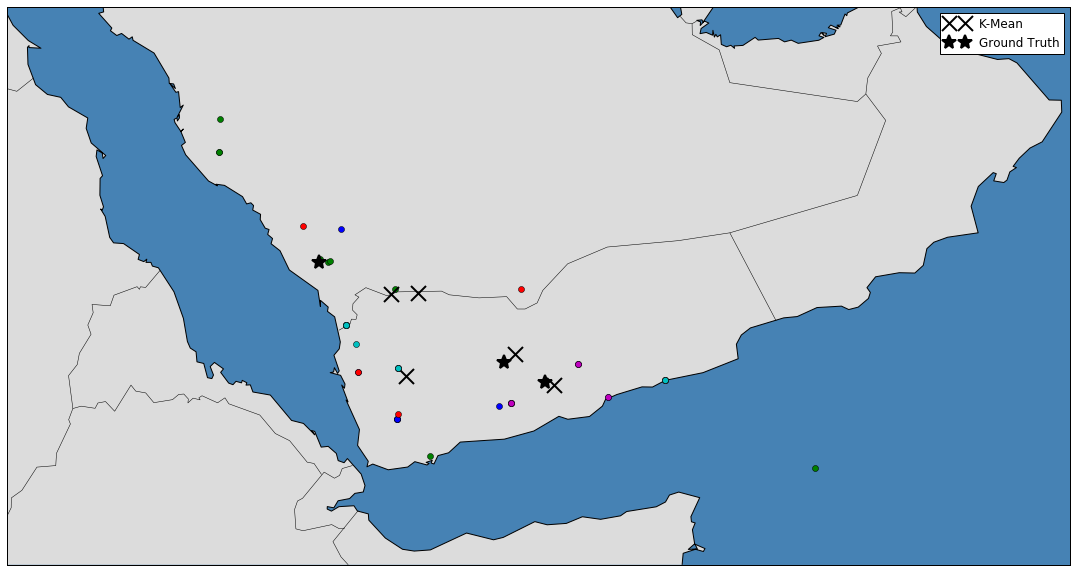

In [473]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap
import numpy as np

# Lambert Conformal Conic map.
fig = plt.figure(figsize=(20,10))
resolution = 1
themap = Basemap(projection='gall',
              llcrnrlon = 35,
              llcrnrlat = 10,
              urcrnrlon = 60,
              urcrnrlat = 25,
              resolution = 'l',
              area_thresh = 100000.0,
              )

themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')

#ax = plt.gca()

for i in range(k):
    
    # select only data observations with cluster label == i
    ds = curated[np.where(labels==i)]
    #ds = mydata[np.where(label_list==i+2)]
    # plot the data observations
    x, y = themap(ds[:,1],ds[:,2])
    handle = themap.plot( x,y,'o',label=str(i) )
    
    center_x, center_y = themap( centroids[i,1], centroids[i,2] )
    lines, = themap.plot(center_x, center_y, 'kx', label='K-Mean')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
    
for i in range(len(true_centroid)):
    
    center_x, center_y = themap( true_centroid[i,1], true_centroid[i,2])
    lines2, = themap.plot(center_x, center_y, 'k*', label='Ground Truth')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
             
for i in range(len(true_true_centroid)):
    
    center_x, center_y = themap( true_true_centroid[i,1], true_true_centroid[i,2])
    #lines2 = themap.plot(center_x, center_y, 'k^')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
    
#handles, labels2 = ax.get_legend_handles_labels()
legend = plt.legend([lines,lines2], ['K-Mean','Ground Truth'])
plt.show()
fig.savefig('plot0a.png', bbox_inches='tight')

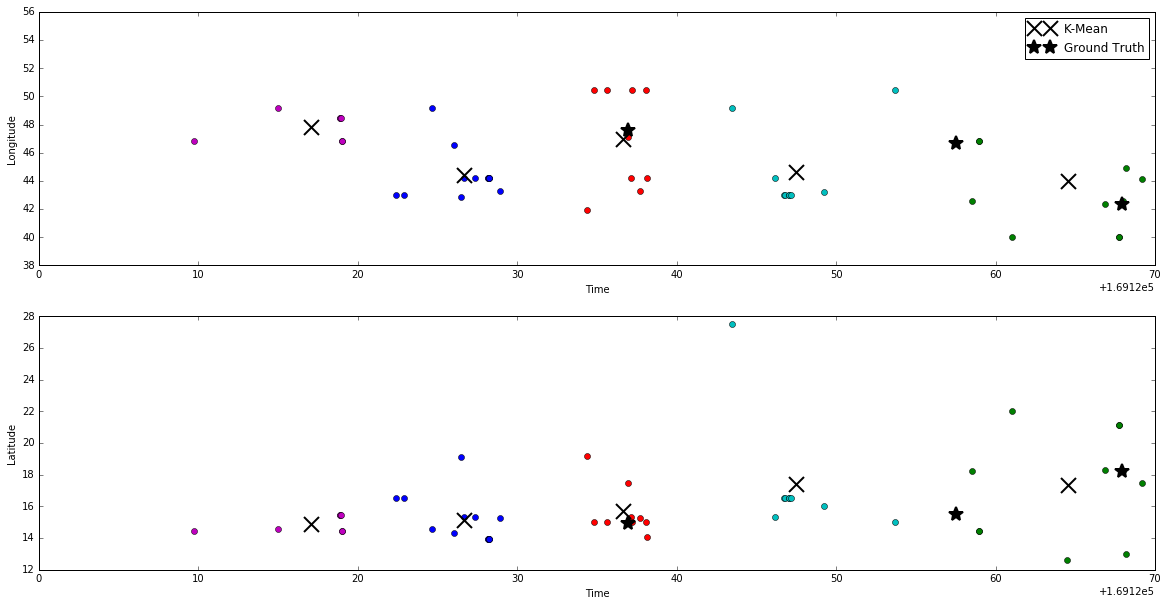

In [475]:
fig = plt.figure(figsize=(20,10))
#f, axarr = plt.subplots(2, sharex=True)
#del ds
ax = plt.gca()
for i in range(k):
    
    # select only data observations with cluster label == i
    #ds = curated[np.where(np.logical_and(labels==i,label_list>=1))]
    ds = curated[np.where(labels==i)]
    # plot the data observations
    ax1 = plt.subplot(211)
    ax1 = plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines1, = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines1,ms=15.0)
    plt.setp(lines1,mew=2.0)
    plt.xlabel('Time')
    plt.ylabel('Longitude')
    
    ax2 = plt.subplot(212)
    ax2 = plt.plot(ds[:,0],ds[:,2],'o')
    lines2 = plt.plot(centroids[i,0],centroids[i,2],'kx')
    #ax2.set_ylabel('Longitude')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
    plt.xlabel('Time')
    plt.ylabel('Latitude')

for i in range(len(true_centroid)):
    plt.subplot(211)
    lines3, = plt.plot(true_centroid[i,0], true_centroid[i,1], 'k*')
    plt.setp(lines3,ms=15.0)
    plt.setp(lines3,mew=2.0)
    
    plt.subplot(212)
    lines4 = plt.plot(true_centroid[i,0], true_centroid[i,2], 'k*')
    plt.setp(lines4,ms=15.0)
    plt.setp(lines4,mew=2.0)

#handles, labels2 = ax.get_legend_handles_labels()
#print handles
plt.subplot(211)
plt.legend([lines1,lines3],['K-Mean','Ground Truth'])
#legend = plt.legend([handles[0],handles[1]], [labels2[0],labels2[1]])
    
for i in range(len(true_true_centroid)):
    plt.subplot(211)
    #lines2 = plt.plot(true_true_centroid[i,0], true_true_centroid[i,1], 'k^')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
    
    plt.subplot(212)
    #lines2 = plt.plot(true_true_centroid[i,0], true_true_centroid[i,2], 'k^')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
#ax.set_xlabel('Latitude')
plt.show()
fig.savefig('plot0b.png', bbox_inches='tight')

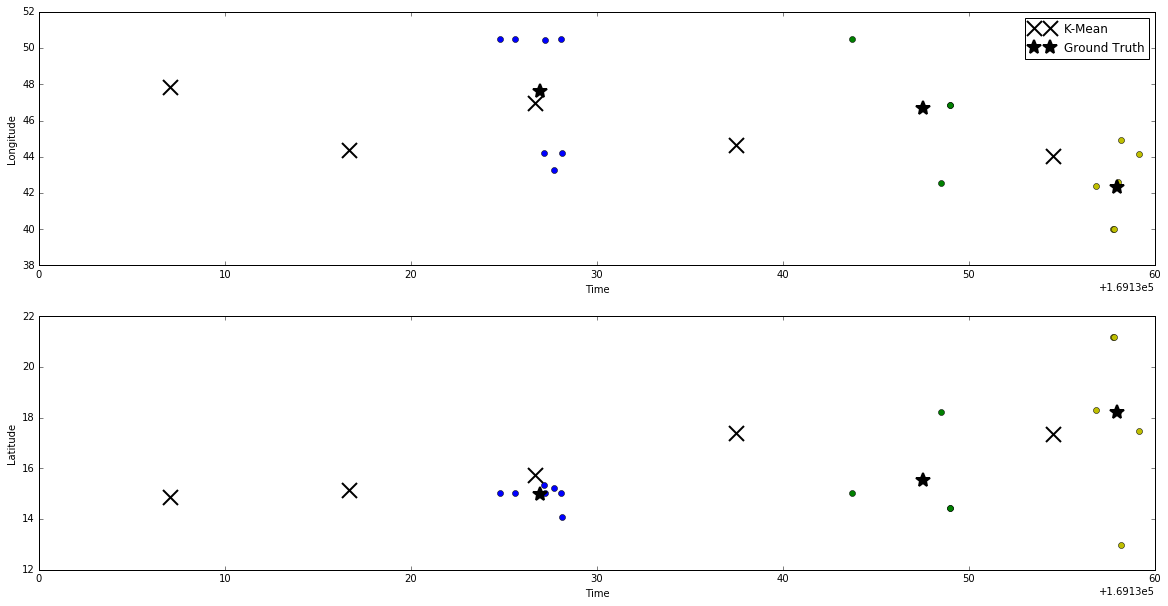

In [478]:
fig = plt.figure(figsize=(20,10))
#f, axarr = plt.subplots(2, sharex=True)
#del ds
for i in range(event):
    
    # select only data observations with cluster label == i
    #ds = curated[np.where(labels==i)]
    ds = mydata[np.where(label_list==i+2)]
    # plot the data observations
    ax1 = plt.subplot(211)
    ax1 = plt.plot(ds[:,0],ds[:,1],'o')
    plt.xlabel('Time')
    plt.ylabel('Longitude')
    # plot the centroids
    try:
        lines1, = plt.plot(centroids[i,0],centroids[i,1],'kx')
        plt.setp(lines1,ms=15.0)
        plt.setp(lines1,mew=2.0)
    except IndexError:
        count+=1
        # make the centroid x's bigger
    
    ax2 = plt.subplot(212)
    ax2 = plt.plot(ds[:,0],ds[:,2],'o')
    plt.xlabel('Time')
    plt.ylabel('Latitude')
    try:
        lines2 = plt.plot(centroids[i,0],centroids[i,2],'kx')
        plt.setp(lines2,ms=15.0)
        plt.setp(lines2,mew=2.0)
    except IndexError:
        count+=1

for i in range(len(true_centroid)):
    plt.subplot(211)
    lines3, = plt.plot(true_centroid[i,0], true_centroid[i,1], 'k*')
    plt.setp(lines3,ms=15.0)
    plt.setp(lines3,mew=2.0)
    
    plt.subplot(212)
    lines4 = plt.plot(true_centroid[i,0], true_centroid[i,2], 'k*')
    plt.setp(lines4,ms=15.0)
    plt.setp(lines4,mew=2.0)

plt.subplot(211)
plt.legend([lines1,lines3],['K-Mean','Ground Truth'])

for i in range(len(true_true_centroid)):
    plt.subplot(211)
    #lines2 = plt.plot(true_true_centroid[i,0], true_true_centroid[i,1], 'k^')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
    
    plt.subplot(212)
    #lines2 = plt.plot(true_true_centroid[i,0], true_true_centroid[i,2], 'k^')
    plt.setp(lines2,ms=15.0)
    plt.setp(lines2,mew=2.0)
plt.show()
fig.savefig('plot0d.png', bbox_inches='tight')

None
[[  1.69146651e+05   4.43873271e+01   1.51388248e+01]
 [  1.69184516e+05   4.40268518e+01   1.73658424e+01]
 [  1.69156655e+05   4.69535514e+01   1.57263428e+01]
 [  1.69167499e+05   4.46554835e+01   1.73914397e+01]
 [  1.69137061e+05   4.78575505e+01   1.48847504e+01]]


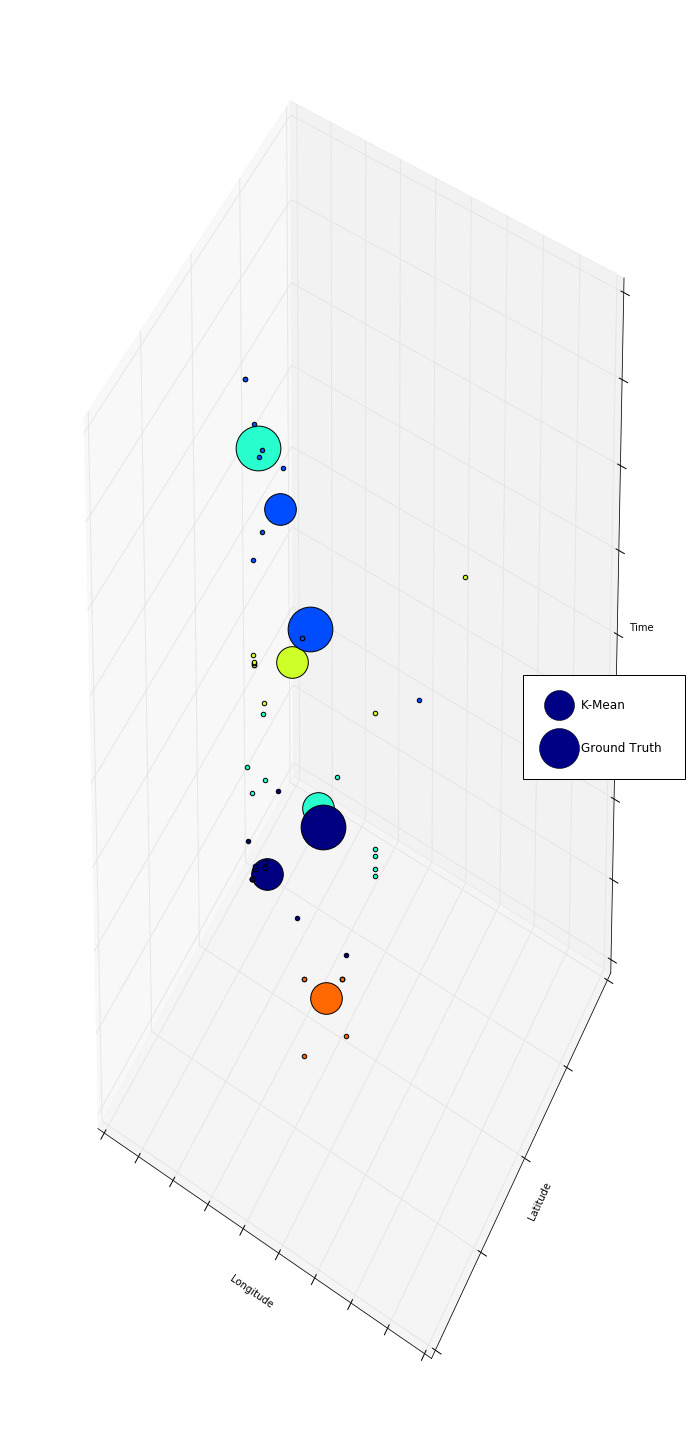

In [477]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(1, figsize=(10,20))#plt.figaspect(2), figsize=(10, 8))
plt.clf()
ax = fig.gca(projection='3d')

ax = Axes3D(fig, rect=[0, 0.05, .95, 1])#, elev=48, azim=134)

plt.cla()

cmap = mpl.cm.jet
print ax.set_autoscale_on(True)

for i in range(k):
    ds = curated[np.where(labels==i)]
    ax.scatter(ds[:, 1], ds[:, 2], ds[:, 0], c=cmap(i / float(k)), depthshade=False) #labels.astype(np.float), depthshade=False)
    #ax.setp(lines,ms=15.0)
    #ax.setp(lines,mew=2.0)
for i in range(len(centroids)):
    lines2 = ax.scatter(centroids[i,1],centroids[i,2],centroids[i,0],c=cmap(i / float(k)),s=1000,label='a')
for i in range(len(true_centroid)):
    lines3 = ax.scatter(true_centroid[i,1], true_centroid[i,2], true_centroid[i,0], c=cmap(i/float(k)),s=2000)
print centroids
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time')
#ax.legend(loc = 'right')
scatter1_proxy = mpl.lines.Line2D([0],[0], linestyle="none", c=cmap(1), marker = 'o', ms=30)
scatter2_proxy = mpl.lines.Line2D([0],[0], linestyle="none", c=cmap(1), marker = 'o', ms=40)
ax.legend([scatter1_proxy, scatter2_proxy], ['K-Mean', 'Ground Truth'], loc='right', labelspacing=2.5, borderpad=2,numpoints = 1)
#plt.legend([lines2,lines3],['K-Mean','Ground Truth'])
plt.show()
fig.savefig('plot0e.png', bbox_inches='tight')